#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# import the XGBoost function for classification
!pip install xgboost
from xgboost import XGBClassifier

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Reading and processing the data

Load the csv file and print the first five observations.

In [5]:
# read the data
df_seed = pd.read_csv('seedtype_data.csv')

# display the first five rows of the data
df_seed.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0.0
1,12.13,13.73,5.394,3.745,5.220,0.0
2,14.86,14.67,NaN,3.258,5.351,0.0
3,15.69,14.75,5.527,3.514,5.046,0.0
4,19.94,16.92,6.675,3.763,6.550,1.0


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

Handling rows with no records

In [7]:
# isna() returns the boolean output
na_data = df_seed.isna() 

# seperate the indicating values for each record 
# all() returns whether all elements are True over the given axis 
df_null = na_data.all(axis='columns') == True

# obtain a list of all records where indicating value is true 
df_null.index[df_null == True].tolist()

[8, 30, 197]

The above output shows that there are 3 null rows in the data. Use the obtained list of indices to eliminate the empty records from the data. 

In [9]:
# use 'dropna()' to drop the empty rows from the dataframe
# 'axis = 0' represents the row
# 'how = all' drops the row with all the null entries 
df_seed = df_seed.dropna(axis = 0, how = 'all')

# check the dimensions of the data after removing the empty rows
df_seed.shape

(199, 6)

Identifying missing data using visualization

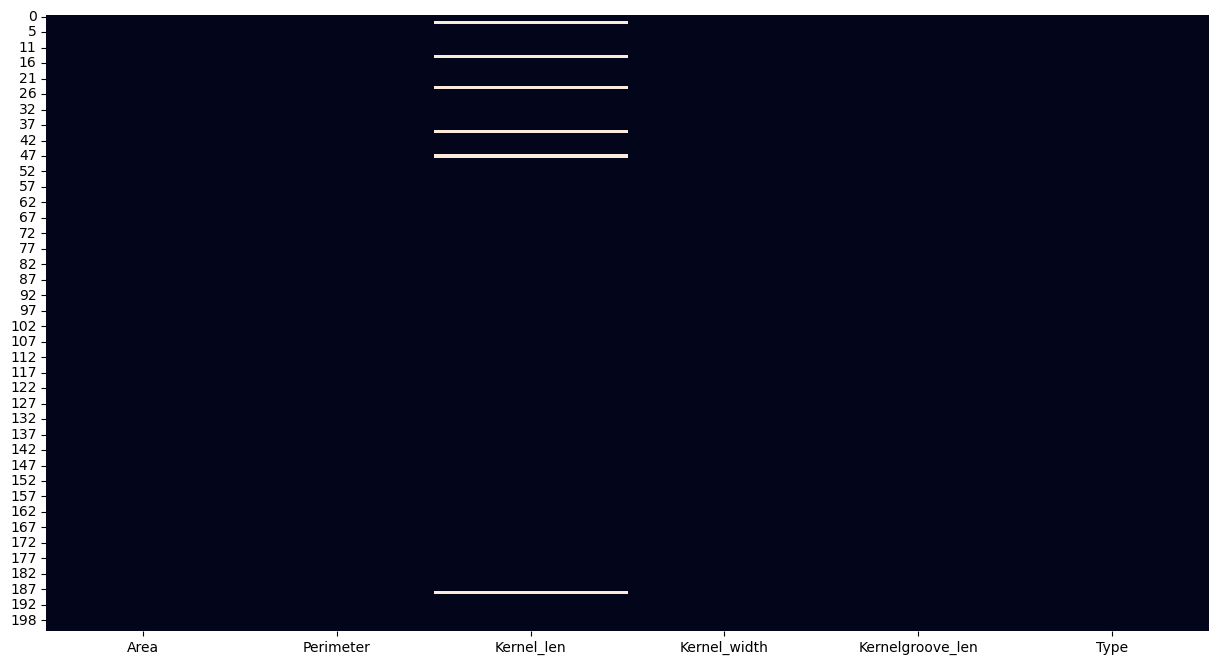

In [11]:
# plot a heatmap for the missing values in the data
# cbar: specify whether to display the color bar or not
sns.heatmap(df_seed.isnull(), cbar = False)

# display the plot
plt.show()

Handling missing data in the variable representing thr length of a wheat kernel

In [13]:
# check the number of null values in the variable 'Kernel_len'
# the 'isnull()' returns the boolean output for the presence of missing value
# the 'sum()' returns the total number of missing values in the variable
print('Null values in the original variable:', df_seed['Kernel_len'].isnull().sum())

# check the statistical summary of the variable 'Kernel_len'
df_seed['Kernel_len'].describe()

Null values in the original variable: 6


count    193.000000
mean       5.651036
std        0.445302
min        4.899000
25%        5.267000
50%        5.554000
75%        6.006000
max        6.675000
Name: Kernel_len, dtype: float64

In [15]:
# replace the missing data with mean value 
# use 'fillna()' to fill the missing data
df_seed['Kernel_len'] = df_seed['Kernel_len'].fillna(df_seed['Kernel_len'].mean())

# check the number of null values after replacing the values
# the 'isnull()' returns the boolean output for the presence of missing value
# the 'sum()' returns the total number of missing values in the variable
print("Null values after replacement:", df_seed['Kernel_len'].isnull().sum())

Null values after replacement: 0


Split the dependent and independent variables.

In [17]:
# split the target and independent variables
# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Type' using drop()
# 'axis = 1' drops the specified column
df_feature = df_seed.drop('Type', axis = 1)

# store the target variable 'Type' in a dataframe 'df_target'
df_target = df_seed['Type']

Plot a boxplot to visualize the outliers in all the independent variables.

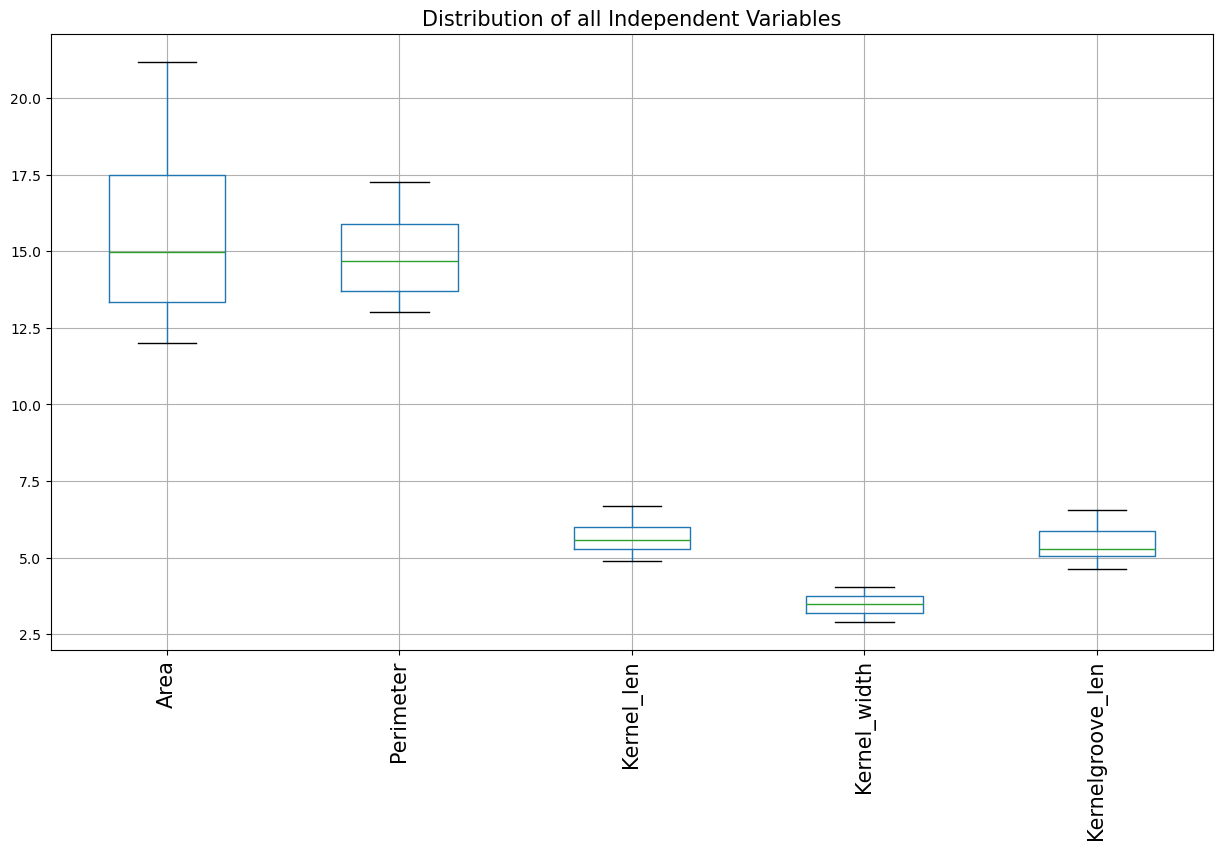

In [19]:
# plot a boxplot to visualize the outliers in all the independent variables
df_feature.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Split the data into training and testing data(80-20 split), using random_state=1. What are the lengths of the training and testing datasets?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
xtrain,xtest,ytrain,ytest= train_test_split(df_seed,df_target,test_size=0.20,random_state=1)
print(len(xtrain))
print(len(xtest))

159
40


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a GB model on the data with 250 estimators each of maximum depth 2 and calculate the accuracy. Use the training and testing data from Question1 and random_state=1.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
# type your code here
from sklearn.ensemble import GradientBoostingClassifier
gbcl= GradientBoostingClassifier(n_estimators=250,max_depth=2,random_state=1)
gbcl.fit(xtrain,ytrain)
y_pred_gbcl = gbcl.predict(xtest)
print(y_pred_gbcl)
print('Accuracy Score',accuracy_score(ytest,y_pred_gbcl))

[0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
Accuracy Score 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model(Using Grid Search and 5 fold CV). Use the training and testing data from Question1 and random_state=1.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators: [100, 150, 200, 250, 300, 350, 400]
        learning_rate: [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
        max_depth = [2, 3, 4, 5, 6, 7, 8]

In [99]:
# type your code here
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100, 150, 200, 250, 300, 350, 400],'learning_rate':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],'max_depth':[2,3,4,5,6,7,8]}
grid_search = GridSearchCV(gbcl,param_grid,cv = 5)
grid_search.fit(xtrain,ytrain)
print('Best Parameters:',grid_search.best_params_)
print('Best Parameters Score:',grid_search.best_score_)

Best Parameters: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 300}
Best Parameters Score: 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build the GB model using the tuned parameters from Question3 and calculate the accuracy score. Use the training and testing data from Question1 and random_state=1.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:
# type your code here

from sklearn.ensemble import GradientBoostingClassifier
gbcl2 = GradientBoostingClassifier(n_estimators=300,learning_rate=0.001,max_depth=2,random_state=1)
gbcl2.fit(xtrain,ytrain)
ypred_gbcl2=gbcl2.predict(xtest)
print(ypred_gbcl2)
accuracy_score(ytest,ypred_gbcl2)

Best Parameters Score: 1.0
[0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]


1.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot the ROC curve with the AUC and the confusion matrix for the model built in Question4.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

[[25  0]
 [ 0 15]]


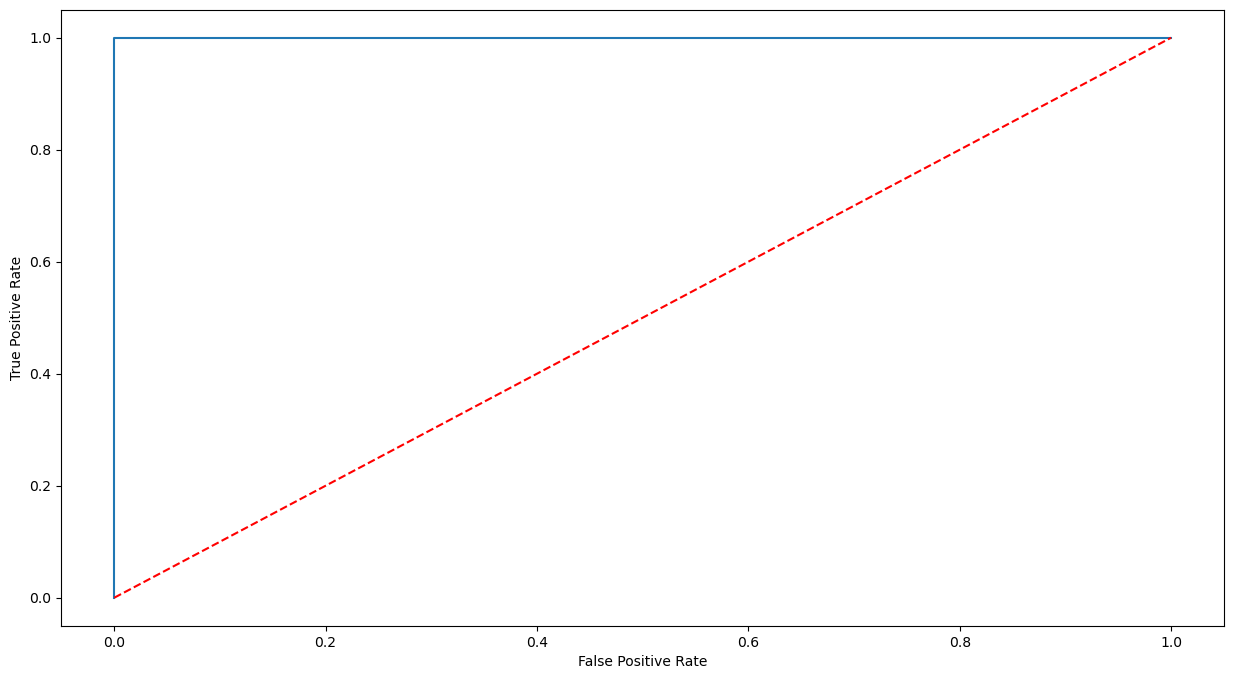

In [65]:
# type your code here
gbcl2_ypred_prob = gbcl2.predict_proba(xtest)[:,1]
cm = confusion_matrix(ytest,ypred_gbcl2)
fpr,tpr,threshholds = roc_curve(ytest,gbcl2_ypred_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'r--')
print(cm)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of hyperparameters "n_estimators", "learning_rate", "gamma" and "max_depth" for the extreme gradient boosting full model(using Grid Search and 5 fold CV). Use the training and testing data from Question1 and random_state=1.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [50, 75, 100, 125, 150]
        learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1]
        gamma = [2, 3, 4, 5, 6]
        max_depth = [2, 3, 4, 5, 6]

In [75]:
# type your code here
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(random_state=1)
Grid_parameters = {'n_estimators' : [50, 75, 100, 125, 150],
    'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1],
    'gamma' : [2, 3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5, 6]}
grid_search = GridSearchCV(xgb,Grid_parameters,cv = 5)
grid_search.fit(xtrain,ytrain)
print('Best Parameters:', grid_search.best_params_)
print('Best Parameters Score:',grid_search.best_score_)

Best Parameters: {'gamma': 2, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 75}
Best Parameters Score: 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build the XGB model using the tuned parameters obtained in Question6. Calculate the accuracy score. Use the training and testing data from Question1 and random_state=1.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
# type your code here
xbg2 = XGBClassifier(gamma = 2,learning_rate=0.005,max_depth=2,n_estimators=75)
xbg2.fit(xtrain,ytrain)
ypred_xgb2 = xbg2.predict(xtest)
print(ypred_xgb2)
print(accuracy_score(ytest,ypred_xgb2))

[0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 1]
1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Plot the ROC curve with the AUC and the confusion matrix for the model built in Question7.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
# type your code here
cm = confusion_matrix(ytest,ypred_xgb2)
cm

array([[25,  0],
       [ 0, 15]], dtype=int64)